An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [763]:
#importing the required libraries

import pandas as pd
import numpy as np

#importing eda libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler


Data Understanding

In [764]:
#importing dataset
score = pd.read_csv('Leads.csv')

In [765]:
#checking with the table
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [766]:
score.shape

(9240, 37)

In [767]:
score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [768]:
#checling the data types
score.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

we can see there is lot of object type in the coloumns , we might have change the type to int or float or others accordingly

In [769]:
#checking the numerical data count , mean etc.
score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [770]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# DATA CLEANING

First step in data cleaning is to check with the null values and make the necessary changes on them. After that we will be checking if any other aspects are present which can be processed properly

In [771]:
score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

When inspected the data ,there were  a lot columns which are unfilled and the opinion is taken as "select" itself. Hence we will have to convert them into null values or NaN  and then count the total null values

In [772]:
select_counts = score.eq('Select').sum()

# Display the counts
print("Count of 'select' in each column:")
print(select_counts)

Count of 'select' in each column:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                        

In [773]:
#replacing theselect with null values
score.replace('Select', np.nan, inplace=True)


In [774]:
#checking if the select is replaced with null , by checking the count
score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

when compared we can see changes in the count of null values , after changing select to null

In [775]:
null_percent = round(score.isnull().sum() * 100 / len(score),2)
print(null_percent)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [776]:
print(null_percent[null_percent >= 35])


Specialization                        36.58
How did you hear about X Education    78.46
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
City                                  39.71
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64


In [777]:
# Select columns where the missing percentage is greater than or equal to 35%
columns_to_drop = null_percent[null_percent >= 35].index

# Drop the selected columns
score = score.drop(columns_to_drop, axis=1)


In [778]:
null_percent_2 = round(score.isnull().sum() * 100 / len(score),2)
print(null_percent_2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

checking the unique values present in the columns , if majority has the same value in a column then it might have a great influence in the analysis. so lets check the values

In [779]:
score['Lead Origin'].value_counts(normalize=True)


Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64

In [780]:
score['Lead Source'].value_counts(normalize=True)


Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: proportion, dtype: float64

we can see there is two values called google and Google, lets combine them as they are same

In [781]:
#combining both the google into one
score['Lead Source']=score['Lead Source'].replace('google','Google')


In [782]:
score['Lead Source'].value_counts(normalize=True)


Lead Source
Google               0.312147
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
Pay per Click Ads    0.000109
blog                 0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
testone              0.000109
NC_EDM               0.000109
Name: proportion, dtype: float64

In [783]:
score['Do Not Email'].value_counts(normalize=True)


Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64

In [784]:
score['Do Not Call'].value_counts(normalize=True)


Do Not Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [785]:
score['Last Activity'].value_counts(normalize=True)


Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: proportion, dtype: float64

In [786]:
score['Country'].value_counts(normalize=True)


Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

In [787]:
score['What is your current occupation'].value_counts(normalize=True)


What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

In [788]:
score['What matters most to you in choosing a course'].value_counts(normalize=True) 


What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [789]:
score['Search'].value_counts(normalize=True) 


Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64

In [790]:
score['Magazine'].value_counts(normalize=True) 


Magazine
No    1.0
Name: proportion, dtype: float64

In [791]:
score['Newspaper Article'].value_counts(normalize=True) 


Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64

In [792]:
score['X Education Forums'].value_counts(normalize=True) 


X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64

In [793]:
score['Digital Advertisement'].value_counts(normalize=True) 


Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64

In [794]:
score['Through Recommendations'].value_counts(normalize=True) 


Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64

In [795]:
score['Receive More Updates About Our Courses'].value_counts(normalize=True) 


Receive More Updates About Our Courses
No    1.0
Name: proportion, dtype: float64

In [796]:
score['Get updates on DM Content'].value_counts(normalize=True) 


Get updates on DM Content
No    1.0
Name: proportion, dtype: float64

In [797]:
score['Update me on Supply Chain Content'].value_counts(normalize=True) 


Update me on Supply Chain Content
No    1.0
Name: proportion, dtype: float64

In [798]:
score['I agree to pay the amount through cheque'].value_counts(normalize=True) 


I agree to pay the amount through cheque
No    1.0
Name: proportion, dtype: float64

In [799]:
score['A free copy of Mastering The Interview'].value_counts(normalize=True) 


A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64

In [800]:
score['Last Notable Activity'].value_counts(normalize=True) 


Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64

we can see in the categorical columns , the values are not equally distributed in other terms it is skewed columns , which makes the data highly imbalance and effects the model building . hence dropping those columns, removing last notable activity as it almost similar to last activity

In [801]:
score.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque','Last Notable Activity'],axis=1,inplace=True)

In [802]:
score.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

we can see the columns are dropped

In [803]:
null_percent_3 = round(score.isnull().sum() * 100 / len(score),2)
print(null_percent_3)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


In [804]:
len(score.columns)

11

combining the values in columns whose percentage is less than 0.1% , so that we will be able to focus on the main columns which help in conversion

In [805]:
score['Lead Origin'] = score['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')


In [806]:
score['Lead Origin'].value_counts(normalize=True) 


Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: proportion, dtype: float64

In [807]:
score['Lead Source'] = score['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [808]:
score['Lead Source'].value_counts(normalize=True) 


Lead Source
Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.037484
Name: proportion, dtype: float64

In [809]:
score['Last Activity']=score['Last Activity'].replace(['Form Submitted on Website','Unreachable'  ,'Unsubscribed','Had a Phone Conversation','Approached upfront',
'View in browser link Clicked','Email Received' ,'Email Marked Spam' ,'Visited Booth in Tradeshow' ,'Resubscribed to emails'],'Others') 

In [810]:
score['Last Activity'].value_counts(normalize=True) 


Last Activity
Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: proportion, dtype: float64

In [811]:
score['What is your current occupation']=score['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')


In [812]:
score['What is your current occupation'].value_counts(normalize=True)


What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: proportion, dtype: float64

In [813]:
null_percent_4 = round(score.isnull().sum() * 100 / len(score),2)
print(null_percent_4)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


let's impute the null values with mode and  numeric value mean or median

In [814]:
score['Lead Source'].fillna('Google',inplace=True)


In [815]:
score['Last Activity'].fillna('Email Opened',inplace=True)


In [816]:
score['What is your current occupation'].fillna('Unemployed', inplace = True)


In [817]:
score['TotalVisits'].describe()


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [818]:
score['TotalVisits'].fillna(score['TotalVisits'].median(),inplace=True)


In [819]:
score['TotalVisits'].describe()


count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [820]:
score['Page Views Per Visit'].describe()


count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [821]:
score['Page Views Per Visit'].fillna(score['Page Views Per Visit'].median(),inplace=True)


In [822]:
score['Page Views Per Visit'].describe()


count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [823]:
#checking if all the null values are replaced or removed
null_percent_5 = round(score.isnull().sum() * 100 / len(score),2)
print(null_percent_5)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


In [824]:
check = score.duplicated()
check.describe()


count      9240
unique        1
top       False
freq       9240
dtype: object

# EDA(Exploratory Data Analysis)

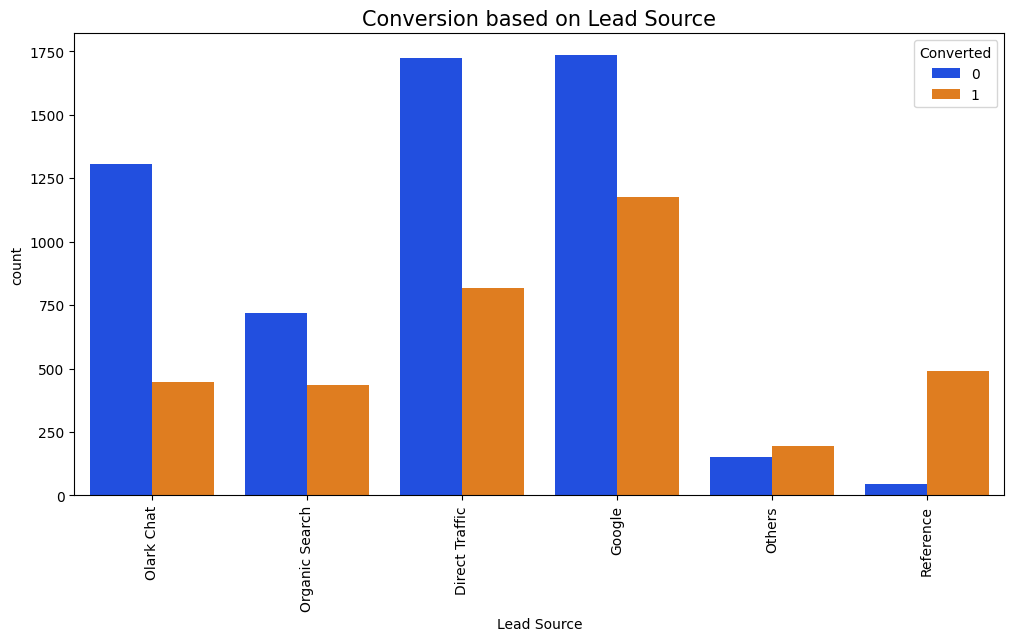

In [825]:
plt.figure(figsize=(12, 6))
sns.countplot(data=score,x='Lead Source',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Google is the main source for lead conversion followed by direct traffic

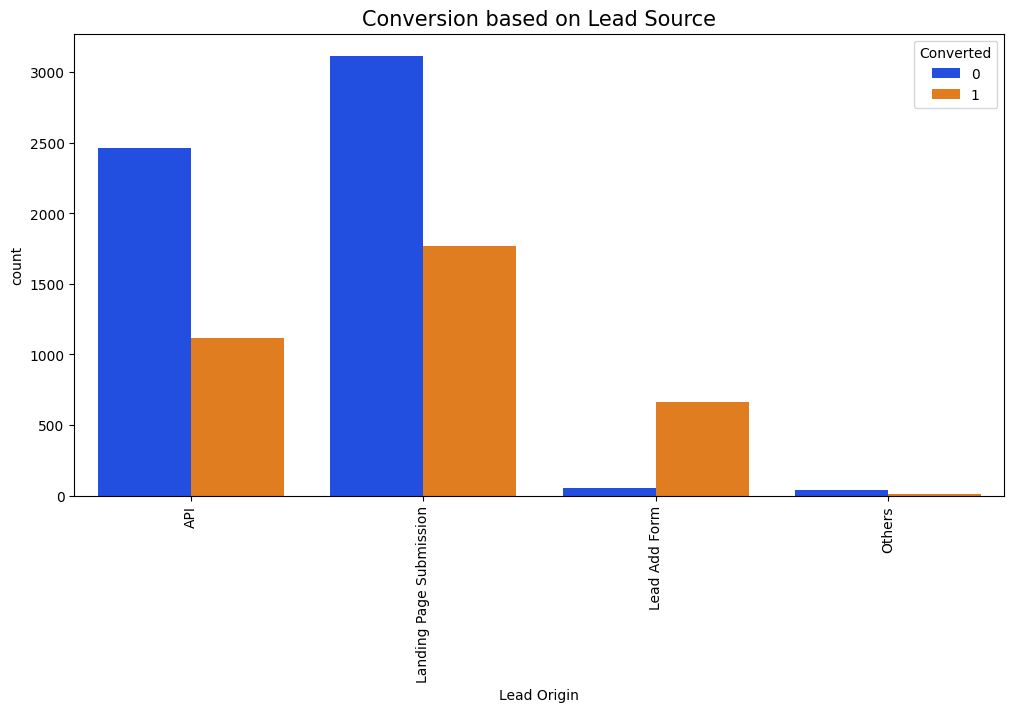

In [826]:
plt.figure(figsize=(12, 6))
sns.countplot(data=score,x='Lead Origin',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the graph , we can say landing page submission are the most converted and we can also observe that lead add form has good conversion ratio when compared to rejections.

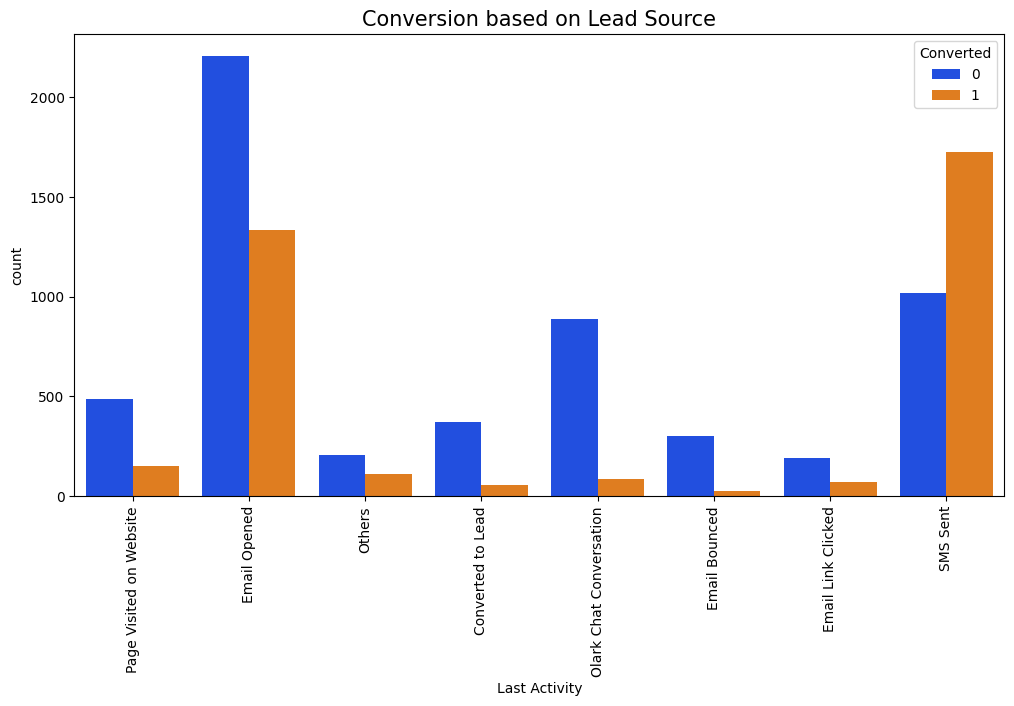

In [827]:
plt.figure(figsize=(12, 6))
sns.countplot(data=score,x='Last Activity',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher.

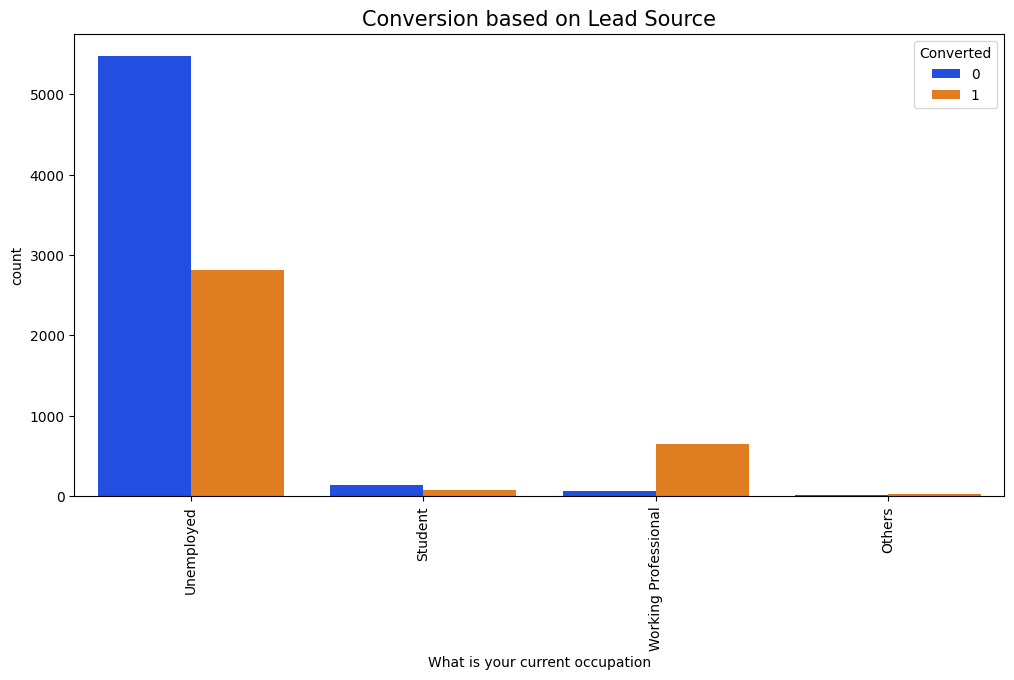

In [828]:
plt.figure(figsize=(12, 6))
sns.countplot(data=score,x='What is your current occupation',hue='Converted')
plt.title('Conversion based on Lead Source',fontsize=15)
plt.xticks(rotation=90)
plt.show()

we will have to mainly focus on unemployed and working professional who are thinking to improve their knowledge and improve themselves

In [829]:
score.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

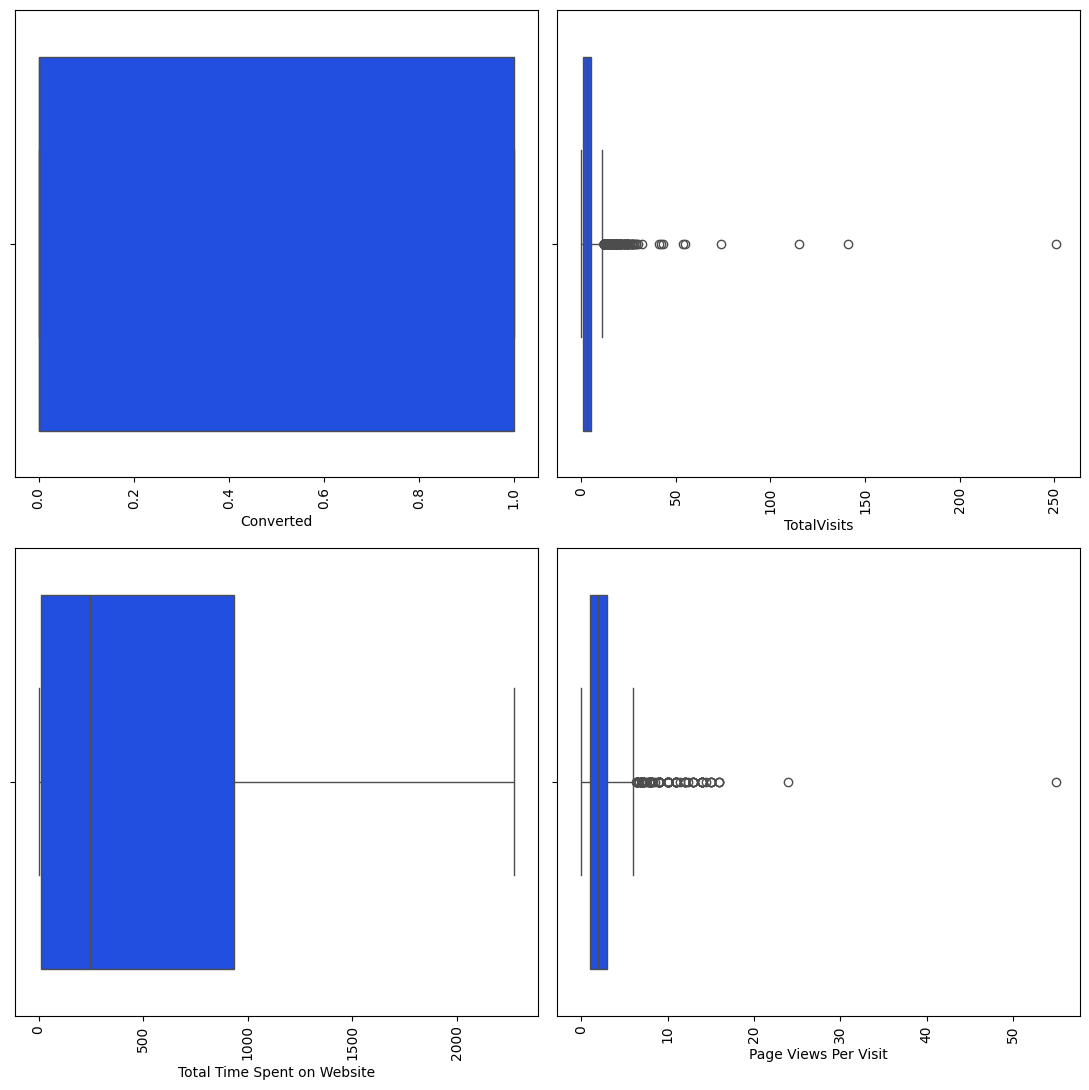

In [830]:
numerical_columns = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(11, 11))
sns.set_palette('bright')

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=col, data=score)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

#### we have outliers in columns

In [831]:
req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = score[col].quantile(0.99)  ## capping higher range outliers
    score.loc[score[col] >= percentiles, col] = percentiles


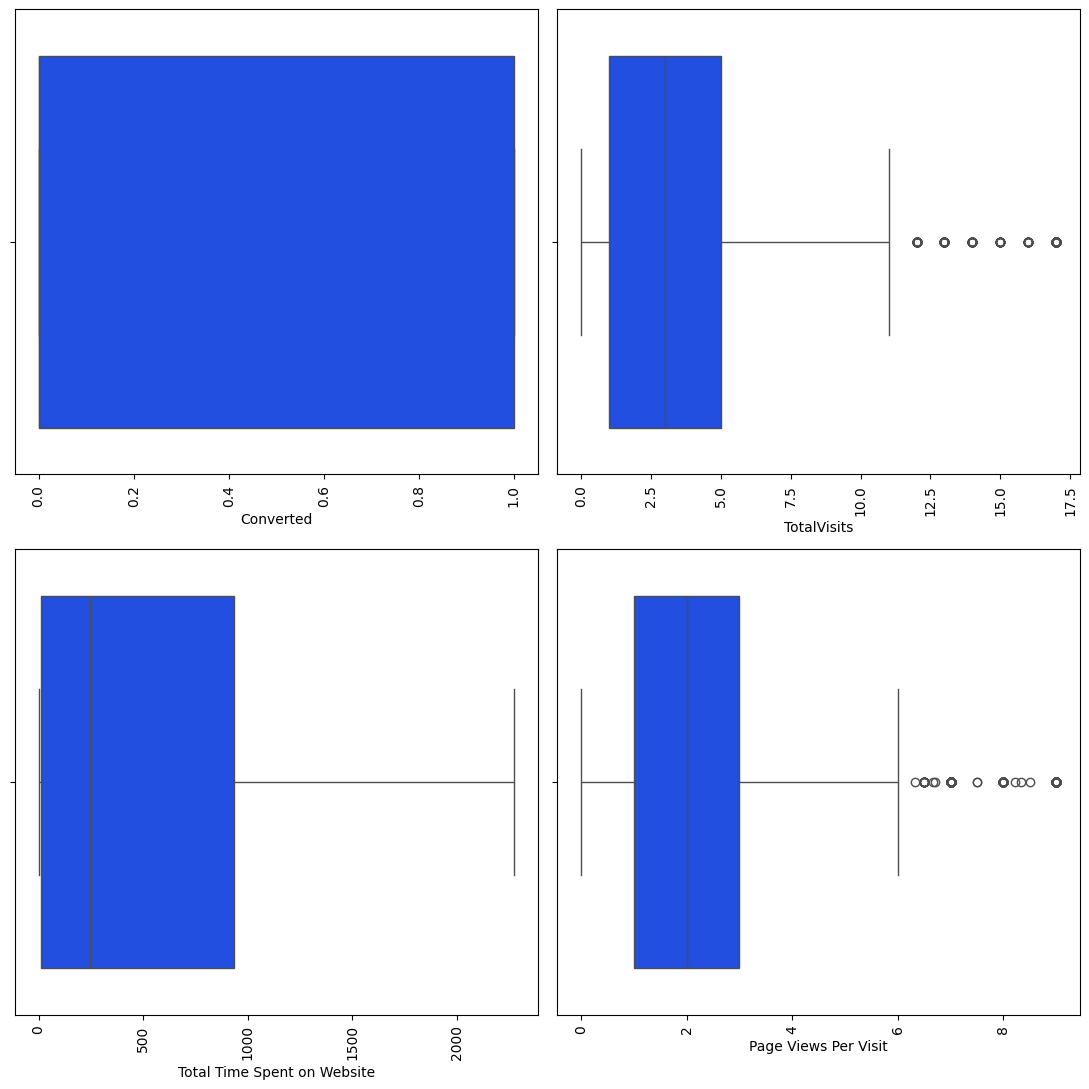

In [832]:
numerical_columns = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(11, 11))
sns.set_palette('bright')

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=col, data=score)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

In [833]:
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


In [834]:
score.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

# Data Preparation
converting the dataypes to int and creating dummies

In [835]:
varlist =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

score[varlist] = score[varlist].apply(binary_map)

In [836]:
dummy1 = pd.get_dummies(score[['Lead Origin','Lead Source','Last Activity','What is your current occupation']], drop_first=True)


In [837]:
score = pd.concat([score, dummy1], axis=1)


In [838]:
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,False,False,False,False,False,True,False,False,True,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,...,False,False,True,False,False,False,False,False,True,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,...,False,False,True,False,False,False,False,True,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,...,False,False,False,False,True,False,False,False,True,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,False,False,False,False,False,False,False,False,True,False


In [839]:
score.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation'],axis=1,inplace=True)


In [840]:
score.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,True,False,False,...,False,False,True,False,False,False,False,True,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [841]:
score.dtypes

Prospect ID                                              object
Lead Number                                               int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                        bool
Lead Origin_Lead Add Form                                  bool
Lead Origin_Others                                         bool
Lead Source_Google                                         bool
Lead Source_Olark Chat                                     bool
Lead Source_Organic Search                                 bool
Lead Source_Others                                         bool
Lead Source_Reference                                      bool
Last Activity_Email Bounced             

we can see the dummies created are in boolean , will be converting them to unit8

In [842]:


# Select boolean columns
bool_columns = score.select_dtypes(include='bool').columns

# Convert boolean columns to uint8
score[bool_columns] = score[bool_columns].astype('uint8')


In [843]:
score.dtypes

Prospect ID                                              object
Lead Number                                               int64
Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Others                                        uint8
Lead Source_Google                                        uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Lead Source_Others                                        uint8
Lead Source_Reference                                     uint8
Last Activity_Email Bounced             

# Test-Train Data Split


In [844]:
from sklearn.model_selection import train_test_split


In [845]:
#removing and addin the  variables to x
x = score.drop(['Converted','Prospect ID','Lead Number'], axis=1)


In [846]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [847]:
#addin the  variables to y
y = score['Converted']


In [848]:
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [849]:
#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)


In [850]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [851]:
#scaling  variables.
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
8105,0.512365,1.365219,1.364995,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [852]:
X_train.describe()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-7.991958e-17,-6.701161e-17,-1.991124e-17,0.311843,0.528139,0.079468,0.005257,0.320810,0.190167,0.121058,...,0.036333,0.028293,0.381262,0.102195,0.033395,0.072047,0.300402,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466824,0.392463,0.326219,...,0.187131,0.165822,0.485734,0.302929,0.179680,0.258586,0.458468,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [853]:
#Converted Rate before modelling
Converted_Rate = (sum(score['Converted'])/len(score['Converted'].index))*100
Converted_Rate

38.53896103896104

# Model Building


In [854]:

import statsmodels.api as sm

In [855]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

In [856]:
print(logm1.fit().summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.6
Date:                Tue, 21 May 2024   Deviance:                       5471.3
Time:                        17:52:33   Pearson chi2:                 7.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [857]:
print(len(X_train.columns))


22


# Model - II

In [858]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [859]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator= logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [860]:
rfe.support_


array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [861]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [862]:
col = X_train.columns[rfe.support_]


Assessing the model that has already been generated through RFE using Statsmodel - Model 2


In [863]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.6
Date:                Tue, 21 May 2024   Deviance:                       5473.3
Time:                        17:52:34   Pearson chi2:                 7.59e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [864]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [865]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,What is your current occupation_Unemployed,22.90
12,Last Activity_Email Opened,9.34
16,Last Activity_SMS Sent,7.66
4,Lead Origin_Lead Add Form,7.11
9,Lead Source_Reference,6.36
3,Lead Origin_Landing Page Submission,4.26
7,Lead Source_Olark Chat,3.57
13,Last Activity_Olark Chat Conversation,3.56
19,What is your current occupation_Working Profes...,3.06
15,Last Activity_Page Visited on Website,2.68


Observations:-

We see there are many variables with a high P-value and VIF value.
We need to continue model building process to improve the model.
Factors that are needed for consideration : VIF < 5% and P-Value < 5%
Inferences from the above :-

we can see the p-values is already less than <5% 
The above model has 20 features, and we need to reduce it further.
Current Occupation_Unemployed has a VIF score of ~22.

# Model - III

In [866]:
col = col.drop('What is your current occupation_Unemployed')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [867]:
print(len(col))


19


In [868]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.3
Date:                Tue, 21 May 2024   Deviance:                       5478.5
Time:                        17:52:34   Pearson chi2:                 7.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3827
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [869]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,Lead Origin_Lead Add Form,7.11
9,Lead Source_Reference,6.31
3,Lead Origin_Landing Page Submission,3.56
12,Last Activity_Email Opened,3.45
7,Lead Source_Olark Chat,3.44
16,Last Activity_SMS Sent,3.00
2,Page Views Per Visit,2.56
0,TotalVisits,2.17
8,Lead Source_Others,1.95
13,Last Activity_Olark Chat Conversation,1.88


For Model 4 - We need to remove Lead Origin_LeadAddform

Model - IV 

In [870]:
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [871]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2814.6
Date:                Tue, 21 May 2024   Deviance:                       5629.3
Time:                        17:52:35   Pearson chi2:                 7.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3681
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [872]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.52
11,Last Activity_Email Opened,3.40
6,Lead Source_Olark Chat,3.36
15,Last Activity_SMS Sent,2.91
2,Page Views Per Visit,2.51
0,TotalVisits,2.16
12,Last Activity_Olark Chat Conversation,1.87
5,Lead Source_Google,1.85
8,Lead Source_Reference,1.71
14,Last Activity_Page Visited on Website,1.52


Prediction of Y - values, as per the final model.



In [873]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.246561
6795    0.228172
3516    0.283931
8105    0.747382
3934    0.246561
4844    0.990317
3297    0.108306
8071    0.990789
987     0.460258
7423    0.921074
dtype: float64

In [874]:
y_train_pred = y_train_pred.values.reshape(-1)


In [875]:
#Creating a data frame with the actual Converted score and Probability of conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,0,0.246561,1871
1,0,0.228172,6795
2,0,0.283931,3516
3,0,0.747382,8105
4,0,0.246561,3934


In [876]:
##Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,0,0.246561,1871,0
1,0,0.228172,6795,0
2,0,0.283931,3516,0
3,0,0.747382,8105,1
4,0,0.246561,3934,0


In [877]:
from sklearn import metrics

# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3513  489]
 [ 772 1694]]


In [878]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.8050401978973407


In [879]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [880]:
TP / float(TP+FN)


0.6869424168694241

In [881]:
TN / float(TN+FP)


0.8778110944527736

In [882]:
print(FP/ float(TN+FP))


0.12218890554722639


In [883]:
print (TN / float(TN+ FN))


0.8198366394399067


ROC Curve and its parameters



In [884]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate ')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [885]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


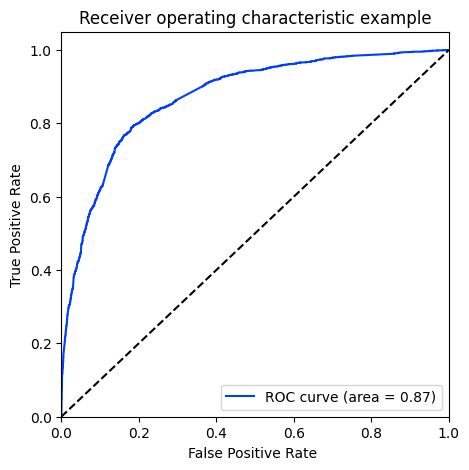

In [886]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


In [887]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.246561,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.228172,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.283931,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.747382,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.246561,3934,0,1,1,1,0,0,0,0,0,0,0


In [888]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix



num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.593074  0.967559  0.362319
0.2   0.2  0.714595  0.927007  0.583708
0.3   0.3  0.786951  0.832522  0.758871
0.4   0.4  0.810606  0.766423  0.837831
0.5   0.5  0.805040  0.686942  0.877811
0.6   0.6  0.786487  0.577048  0.915542
0.7   0.7  0.771645  0.491890  0.944028
0.8   0.8  0.734385  0.351582  0.970265
0.9   0.9  0.698670  0.227899  0.988756


#### **Intersection between Accuracy - Sensitivity and Specificity**

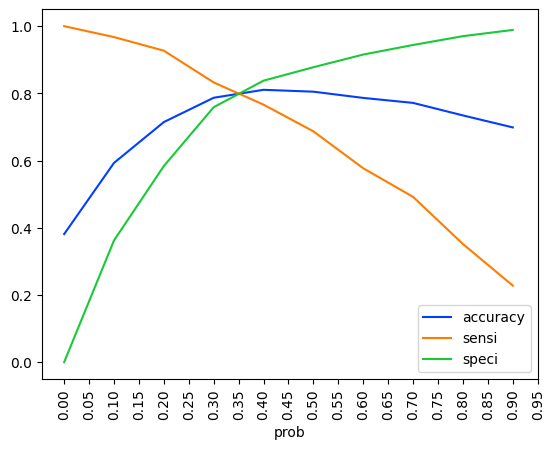

<Figure size 1100x1100 with 0 Axes>

In [889]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

Calculation of predicted values on the score : 0.35

In [890]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.246561,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.228172,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.283931,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.747382,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.246561,3934,0,1,1,1,0,0,0,0,0,0,0,0


Metrics calculation for after choosing final probability cut off.


In [891]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.8007111935683364

In [892]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3208,  794],
       [ 495, 1971]], dtype=int64)

In [893]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [894]:
TP / float(TP+FN)


0.7992700729927007

In [895]:
TN / float(TN+FP)


0.8015992003998001

In [896]:
print(FP/ float(TN+FP))


0.1984007996001999


In [897]:
print (TP / float(TP+FP))


0.7128390596745027


In [898]:
print (TN / float(TN+ FN))


0.8663246016743181


Accuracy -79.9%

Senstivity - 71%

specificity - 80%

Model Evaluation - ON TEST SET


In [899]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [900]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Working Professional
4269,1.433341,0.964504,2.892276,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2376,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.364995,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
9199,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4359,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


Building the model - ON TEST SET


In [901]:
X_test_sm = sm.add_constant(X_test)


In [902]:
y_test_pred = res.predict(X_test_sm)


In [903]:
y_test_pred[:10]


4269    0.601210
2376    0.925268
7766    0.679843
9199    0.058092
4359    0.797708
9186    0.454221
1631    0.383738
8963    0.238779
8007    0.046902
5324    0.314103
dtype: float64

Creating a dataframe with the predicted values


In [904]:
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.601210
2376,0.925268
7766,0.679843
9199,0.058092
4359,0.797708


creating a dataframe with predicted value

In [905]:
y_test_df = pd.DataFrame(y_test)


In [906]:
y_test_df['CustID'] = y_test_df.index


In [907]:
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [908]:
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)


In [909]:
#printing to check whether the  are combined properly 
y_pred_final.head()


,Converted,CustID,0
0,1,4269,0.601210
1,1,2376,0.925268
2,1,7766,0.679843
3,0,9199,0.058092
4,1,4359,0.797708


In [910]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})


In [911]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)


In [912]:
y_pred_final.head()


,Converted,CustID,Conversion_Prob,final_predicted
0,1,4269,0.601210,1
1,1,2376,0.925268,1
2,1,7766,0.679843,1
3,0,9199,0.058092,0
4,1,4359,0.797708,1


Calculation of Model Evaluation parameters



In [913]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.797979797979798

In [914]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

array([[1347,  330],
       [ 230,  865]], dtype=int64)

In [915]:

TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [916]:
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

79.0


In [917]:
TN / float(TN+FP)


0.8032200357781754

Accuracy - 79.9%

sensitivity -79.0%

specificity -80%

OBSERVATION

**We got 0.2% to 0.7% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.**

**From our model, We can conclude following points :**
    
**1. The customer/leads who fills the form are the potential leads.**

**2. We must majorly focus on working professionals.**

**3. We must majorly focus on leads whose last activity is SMS sent or Email opened.** 

**4. It’s always good to focus on customers, who have spent significant time on our website.**

**5. If the lead source is referral, he/she may not be the potential lead.**


LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS


In [918]:
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [919]:
X = X[col]
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Working Professional
0,-1.462483,-0.886994,-2.243155,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,-1.418073,-0.886994,-2.075224,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-1.444719,-0.886994,-2.108810,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,-1.453601,-0.886994,-2.175982,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.444719,-0.886994,-2.175982,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [920]:
X_sm = sm.add_constant(X)


In [921]:
y_ans_pred = res.predict(X_sm)


In [922]:
y_ans_pred[:10]


0    0.149367
1    0.146517
2    0.160622
3    0.102426
4    0.039829
5    0.072587
6    0.145850
7    0.072587
8    0.113209
9    0.181236
dtype: float64

In [923]:
y_ans_pred_df = pd.DataFrame(y_ans_pred)


In [924]:
y_df = pd.DataFrame(y)


In [925]:
y_df['Lead_Number'] = score['Lead Number']


In [926]:
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [927]:
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)


In [928]:
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})


In [929]:
y_ans_final.head()


,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.149367
1,0,660728,0.146517
2,1,660727,0.160622
3,0,660719,0.102426
4,1,660681,0.039829


Finding the converted value using the probability cut-off = 0.35


In [930]:
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)


In [931]:

y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)


In [932]:
y_ans_final.head()


,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.149367,0,14.94
1,0,660728,0.146517,0,14.65
2,1,660727,0.160622,0,16.06
3,0,660719,0.102426,0,10.24
4,1,660681,0.039829,0,3.98


Metric Calculation - Complete Dataframe


In [933]:
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)


0.7484848484848485

In [934]:
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[5276,  403],
       [1921, 1640]], dtype=int64)

In [935]:
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [936]:
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

46.0


In [937]:
TN / float(TN+FP)


0.9290368022539179

Sorting The Dataframe - To Find The Top Leads


In [938]:
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)


In [939]:
ResultDf.head()


,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
807,1,651935,0.996441,1,99.64
2042,1,639977,0.996441,1,99.64
5790,1,605320,0.996441,1,99.64
8088,1,588003,0.996441,1,99.64
8089,1,588001,0.996441,1,99.64


In [940]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 35]


In [941]:
print(ResultDf.shape)
print(FilteredResult.shape)

(9240, 5)
(2043, 5)


In [942]:
FilteredResult.head(10)


,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
807,1,651935,0.996441,1,99.64
2042,1,639977,0.996441,1,99.64
5790,1,605320,0.996441,1,99.64
8088,1,588003,0.996441,1,99.64
8089,1,588001,0.996441,1,99.64
5787,1,605328,0.996441,1,99.64
5785,1,605332,0.996441,1,99.64
2686,1,633910,0.996441,1,99.64
8090,1,588000,0.996441,1,99.64
5784,1,605335,0.996441,1,99.64


In [943]:
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

80.27410670582476

After providing the data of potential lead  ,When checked for conversion rate, it is found to be around 72%.**

Sorting The Dataframe - To Find The Hot Leads With Higher Conversion Rate.


In [944]:
HotLeads = ResultDf.loc[ResultDf['Score'] >= 90]


In [945]:
HotLeads.shape


(436, 5)

In [946]:
Converted_Rate_ForHotLeads= (sum(HotLeads['Converted'])/len(HotLeads['Converted'].index))*100
Converted_Rate_ForHotLeads

93.34862385321101

**Here, we provide a list of only 843 who are hot lead that is who are sure to be converted to a lead,  so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 92%.**

## CONCLUSION

- **Conversion Rate for hot leads increases from 73% to 92%.**

- **Focusing on Hot Leads is the best for the company as it can help in focusing on the potenial customers who can enroll and also this helps in having better coustomer and company relationship.**

**From our model, we can conclude following points :**

- The customer/leads who fills the form are the potential leads.
- We must majorly focus on working professionals.
- We must majorly focus on leads whose last activity is SMS sent or Email opened.
- It’s always good to focus on customers, who have spent significant time on our website.
- If the lead source is referral, he/she may not be the potential lead.
